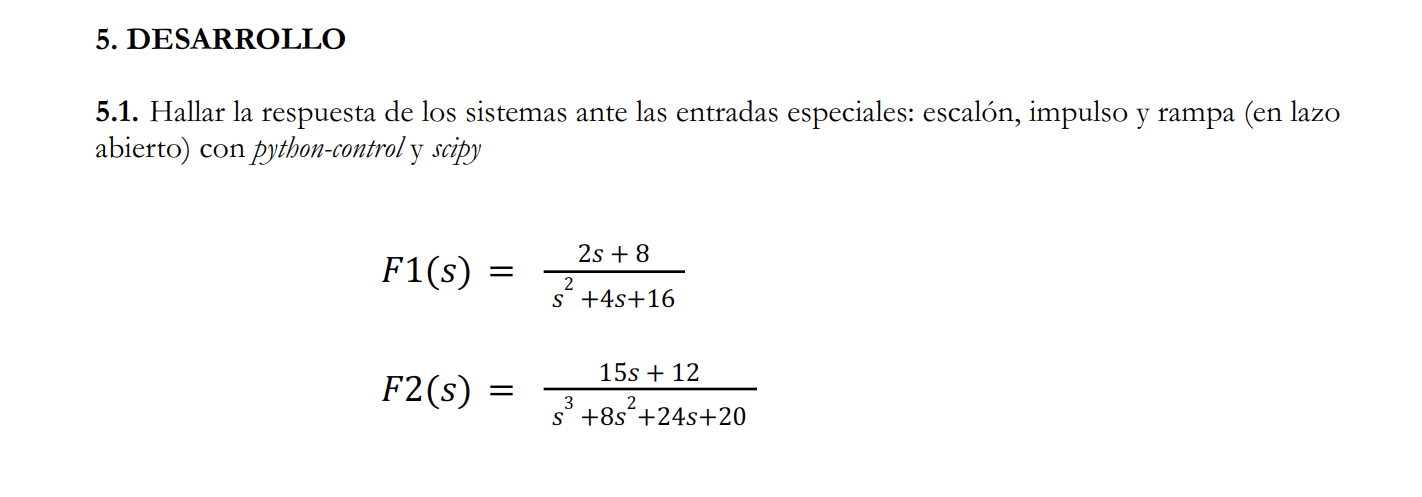

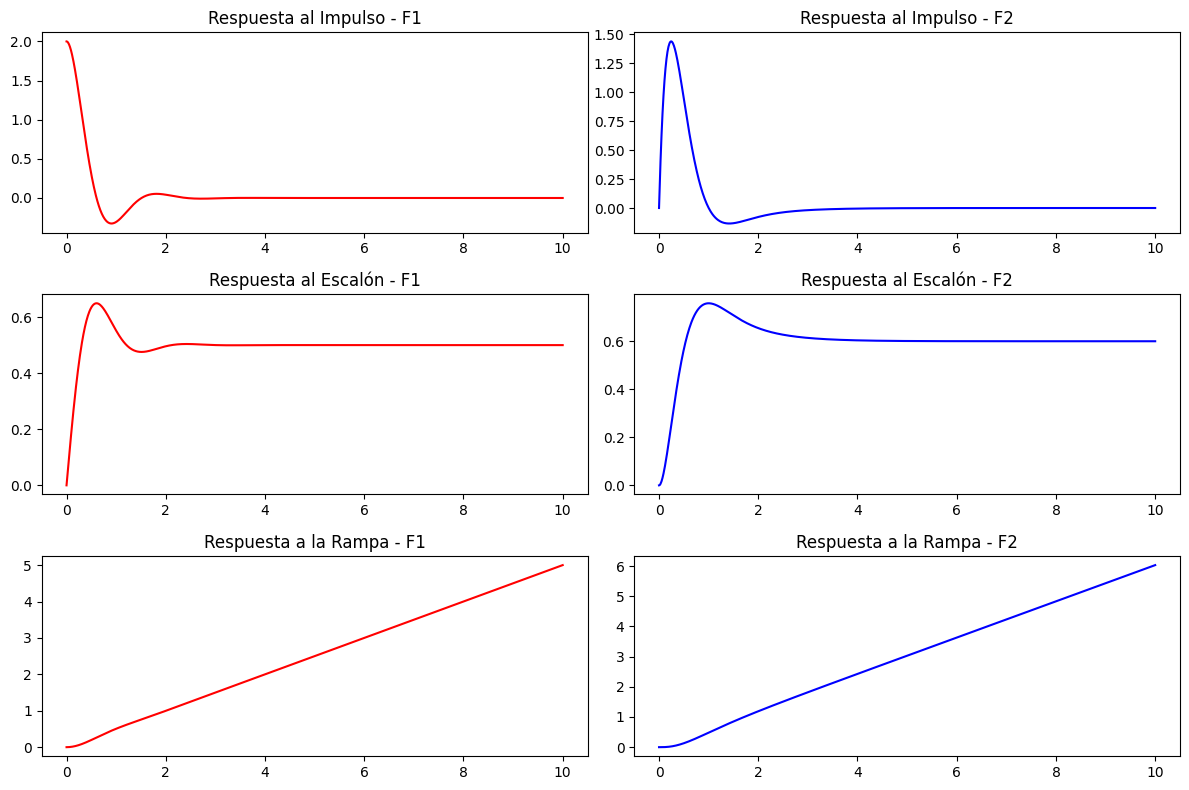

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir las funciones de transferencia
num1, den1 = [2, 8], [1, 4, 16]
num2, den2 = [15, 12], [1, 8, 24, 20]

# Crear sistemas
F1 = ctrl.TransferFunction(num1, den1)
F2 = ctrl.TransferFunction(num2, den2)

# Crear tiempo de simulación
t = np.linspace(0, 10, 1000)

# Respuesta al impulso
t1, y_impulse1 = ctrl.impulse_response(F1, T=t)
t2, y_impulse2 = ctrl.impulse_response(F2, T=t)

# Respuesta al escalón
t1, y_step1 = ctrl.step_response(F1, T=t)
t2, y_step2 = ctrl.step_response(F2, T=t)

# Respuesta a la rampa (entrada rampa es t)
_, y_ramp1 = ctrl.forced_response(F1, T=t, U=t)
_, y_ramp2 = ctrl.forced_response(F2, T=t, U=t)

# Graficar resultados
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(t1, y_impulse1, 'r')
plt.title("Respuesta al Impulso - F1")

plt.subplot(3, 2, 2)
plt.plot(t2, y_impulse2, 'b')
plt.title("Respuesta al Impulso - F2")

plt.subplot(3, 2, 3)
plt.plot(t1, y_step1, 'r')
plt.title("Respuesta al Escalón - F1")

plt.subplot(3, 2, 4)
plt.plot(t2, y_step2, 'b')
plt.title("Respuesta al Escalón - F2")

plt.subplot(3, 2, 5)
plt.plot(t, y_ramp1, 'r')
plt.title("Respuesta a la Rampa - F1")

plt.subplot(3, 2, 6)
plt.plot(t, y_ramp2, 'b')
plt.title("Respuesta a la Rampa - F2")

plt.tight_layout()
plt.show()


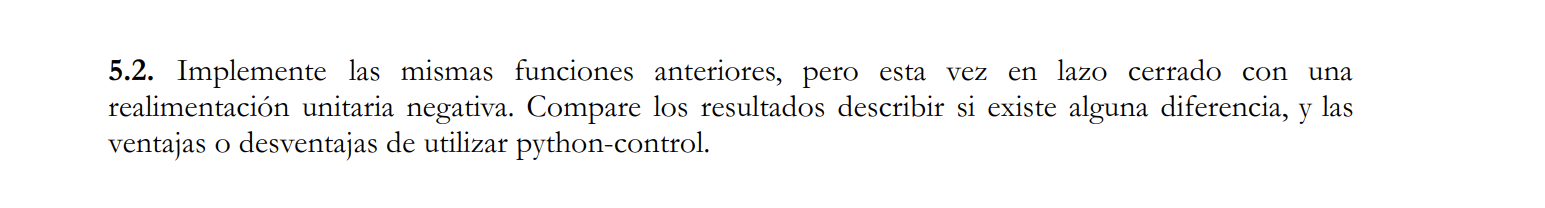

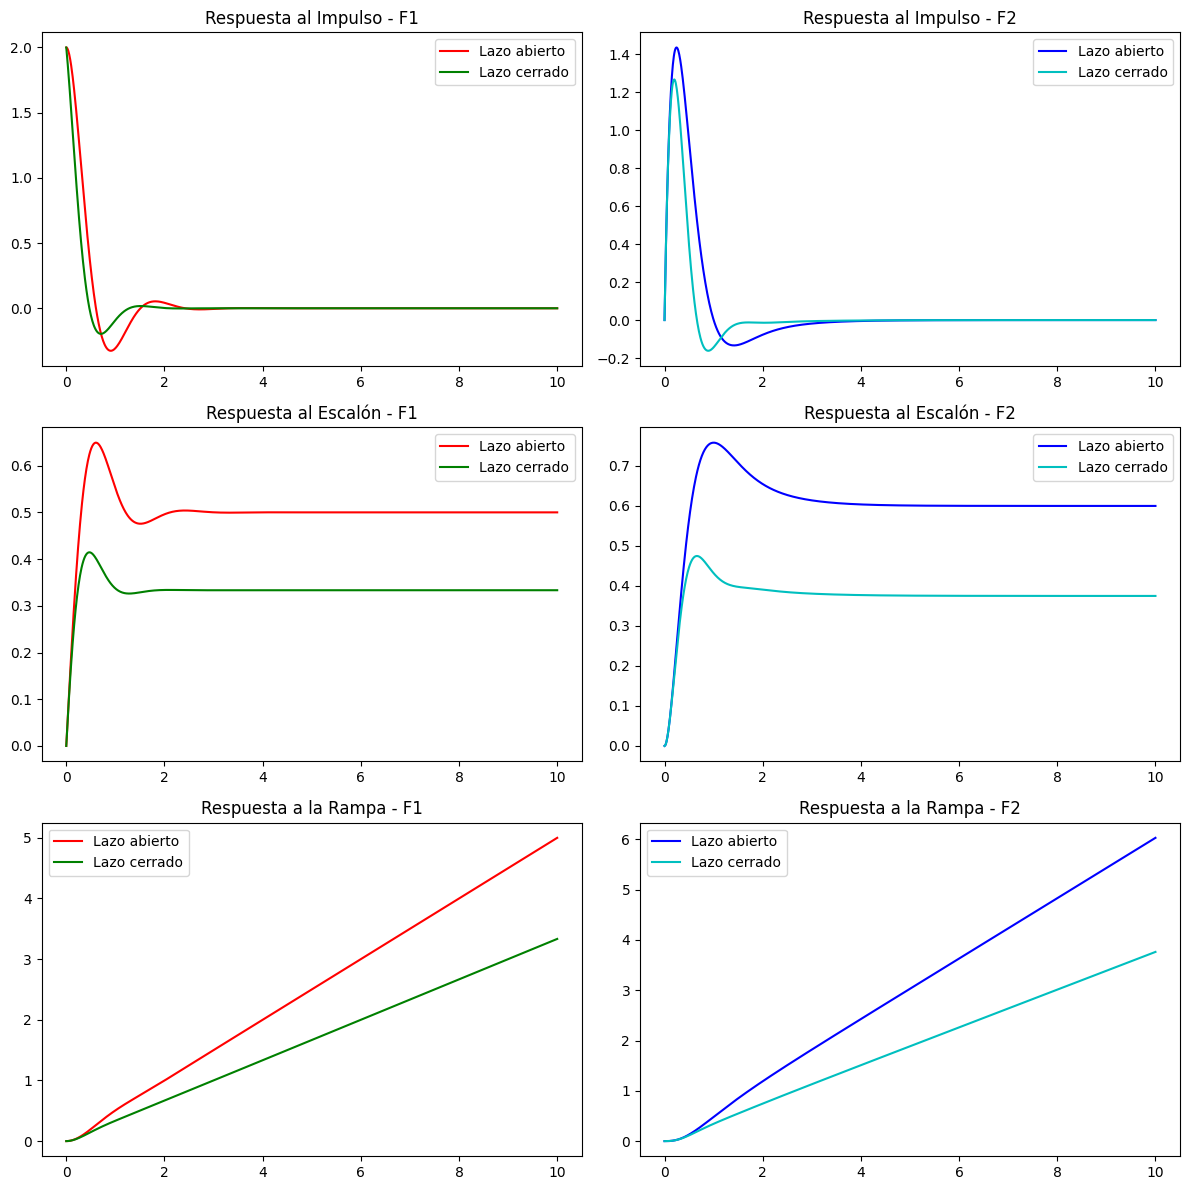

In [2]:
# Definir las funciones de transferencia (la versión abierta)
num1, den1 = [2, 8], [1, 4, 16]
num2, den2 = [15, 12], [1, 8, 24, 20]

# Crear sistemas en lazo abierto
F1_open = ctrl.TransferFunction(num1, den1)
F2_open = ctrl.TransferFunction(num2, den2)

# Función de transferencia de lazo cerrado con realimentación unitaria negativa
F1_closed = F1_open / (1 + F1_open)
F2_closed = F2_open / (1 + F2_open)

# Crear tiempo de simulación
t = np.linspace(0, 10, 1000)

# Respuesta al impulso (lazo abierto y lazo cerrado)
t1, y_impulse1_open = ctrl.impulse_response(F1_open, T=t)
t2, y_impulse2_open = ctrl.impulse_response(F2_open, T=t)
t1, y_impulse1_closed = ctrl.impulse_response(F1_closed, T=t)
t2, y_impulse2_closed = ctrl.impulse_response(F2_closed, T=t)

# Respuesta al escalón (lazo abierto y lazo cerrado)
t1, y_step1_open = ctrl.step_response(F1_open, T=t)
t2, y_step2_open = ctrl.step_response(F2_open, T=t)
t1, y_step1_closed = ctrl.step_response(F1_closed, T=t)
t2, y_step2_closed = ctrl.step_response(F2_closed, T=t)

# Respuesta a la rampa (lazo abierto y lazo cerrado)
_, y_ramp1_open = ctrl.forced_response(F1_open, T=t, U=t)
_, y_ramp2_open = ctrl.forced_response(F2_open, T=t, U=t)
_, y_ramp1_closed = ctrl.forced_response(F1_closed, T=t, U=t)
_, y_ramp2_closed = ctrl.forced_response(F2_closed, T=t, U=t)

# Graficar resultados
plt.figure(figsize=(12, 12))

# Impulso
plt.subplot(3, 2, 1)
plt.plot(t1, y_impulse1_open, 'r', label="Lazo abierto")
plt.plot(t1, y_impulse1_closed, 'g', label="Lazo cerrado")
plt.title("Respuesta al Impulso - F1")
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(t2, y_impulse2_open, 'b', label="Lazo abierto")
plt.plot(t2, y_impulse2_closed, 'c', label="Lazo cerrado")
plt.title("Respuesta al Impulso - F2")
plt.legend()

# Escalón
plt.subplot(3, 2, 3)
plt.plot(t1, y_step1_open, 'r', label="Lazo abierto")
plt.plot(t1, y_step1_closed, 'g', label="Lazo cerrado")
plt.title("Respuesta al Escalón - F1")
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(t2, y_step2_open, 'b', label="Lazo abierto")
plt.plot(t2, y_step2_closed, 'c', label="Lazo cerrado")
plt.title("Respuesta al Escalón - F2")
plt.legend()

# Rampa
plt.subplot(3, 2, 5)
plt.plot(t, y_ramp1_open, 'r', label="Lazo abierto")
plt.plot(t, y_ramp1_closed, 'g', label="Lazo cerrado")
plt.title("Respuesta a la Rampa - F1")
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(t, y_ramp2_open, 'b', label="Lazo abierto")
plt.plot(t, y_ramp2_closed, 'c', label="Lazo cerrado")
plt.title("Respuesta a la Rampa - F2")
plt.legend()

plt.tight_layout()
plt.show()

# Análisis de Sistemas de Control: Lazo Abierto vs Cerrado

## 1. Análisis de las Respuestas

### 1.1 Respuesta al Impulso

**Sistema F1:**

- **Lazo abierto:**  Presenta un pico inicial alto (aprox. 2.0) seguido de una oscilación subamortiguada con un sobrepaso negativo notable, para luego estabilizarse en cero.

- **Lazo cerrado:**  Exhibe un comportamiento más amortiguado, con menor oscilación y un retorno más suave a cero, aunque mantiene un pico inicial similar.

- **Comparación:**  La realimentación reduce significativamente las oscilaciones y mejora el amortiguamiento del sistema.

**Sistema F2:**

- **Lazo abierto:**  Muestra un pico más bajo (aprox. 1.4) con oscilaciones menos pronunciadas que F1.

- **Lazo cerrado:**  Presenta un pico inicial menor (aprox. 1.2) y oscilaciones más atenuadas, alcanzando el estado estacionario más rápidamente.

- **Comparación:**  La realimentación reduce tanto la amplitud de la respuesta como el tiempo de estabilización.

### 1.2 Respuesta al Escalón

**Sistema F1:**

- **Lazo abierto:**  Alcanza un valor estable de aproximadamente 0.5 después de experimentar un sobrepaso significativo (aprox. 0.65).

- **Lazo cerrado:**  Se estabiliza en un valor menor (aprox. 0.33) con un sobrepaso considerablemente reducido.

- **Comparación:**  La realimentación reduce tanto el valor final (ganancia estática) como el sobrepaso, mejorando la estabilidad del sistema.

**Sistema F2:**

- **Lazo abierto:**  Se estabiliza en aproximadamente 0.6 con un sobrepaso moderado.

- **Lazo cerrado:**  Alcanza un valor estable más bajo (aprox. 0.38) con un sobrepaso menos pronunciado.

- **Comparación:**  La realimentación disminuye la ganancia estática y mejora el comportamiento transitorio, confirmando el patrón observado en F1.

### 1.3 Respuesta a la Rampa

**Sistema F1:**

- **Lazo abierto:**  Muestra una pendiente mayor, alcanzando aproximadamente 5.0 al final del intervalo de simulación.

- **Lazo cerrado:**  Presenta una pendiente significativamente menor, llegando a aproximadamente 3.3 al final del mismo intervalo.

- **Comparación:**  La realimentación reduce notablemente la ganancia ante entrada tipo rampa, aumentando el error de seguimiento.

**Sistema F2:**

- **Lazo abierto:**  Exhibe comportamiento similar a F1 pero con pendiente aún mayor, alcanzando aproximadamente 6.0.

- **Lazo cerrado:**  Muestra una pendiente claramente reducida, llegando a aproximadamente 3.8.

- **Comparación:**  Confirma el efecto de la realimentación en la reducción de la ganancia para señales tipo rampa en ambos sistemas.

## 2. Conclusiones

1. **Estabilidad mejorada:**  En ambos sistemas, la realimentación negativa mejora significativamente la estabilidad, reduciendo tanto las oscilaciones como el sobrepaso. Esto se observa claramente en las respuestas al impulso y al escalón.

2. **Reducción de ganancia estática:**  La configuración de lazo cerrado reduce la ganancia estática en ambos sistemas, como se evidencia en las respuestas al escalón donde los valores finales son menores que en lazo abierto.

3. **Compromiso en seguimiento de referencias:**  Para entradas tipo rampa, los sistemas en lazo cerrado muestran un error en estado estacionario mayor (pendiente menor), revelando una limitación fundamental en el seguimiento de referencias dinámicas con realimentación unitaria simple.

4. **Diferencias de amortiguamiento:**  El sistema F1 exhibe oscilaciones más pronunciadas que F2, tanto en configuración abierta como cerrada, indicando un menor amortiguamiento intrínseco en F1.

5. **Efecto de la estructura del sistema:**  F2, al ser un sistema de orden superior (denominador de tercer orden), presenta características dinámicas diferentes a F1 (segundo orden), pero ambos muestran mejoras similares con la realimentación.

6. **Aplicaciones prácticas:**  Los resultados sugieren que para aplicaciones que requieren estabilidad y rechazo a perturbaciones, la configuración de lazo cerrado es preferible, mientras que para seguimiento preciso de referencias dinámicas (como rampas), pueden ser necesarias estructuras de control más complejas que la simple realimentación unitaria.

7. **Compensaciones de diseño:**  Las gráficas ilustran las compensaciones inherentes en el diseño de sistemas de control: la realimentación mejora la estabilidad y reduce la sensibilidad a perturbaciones, pero puede comprometer la capacidad de seguimiento y la velocidad de respuesta del sistema.

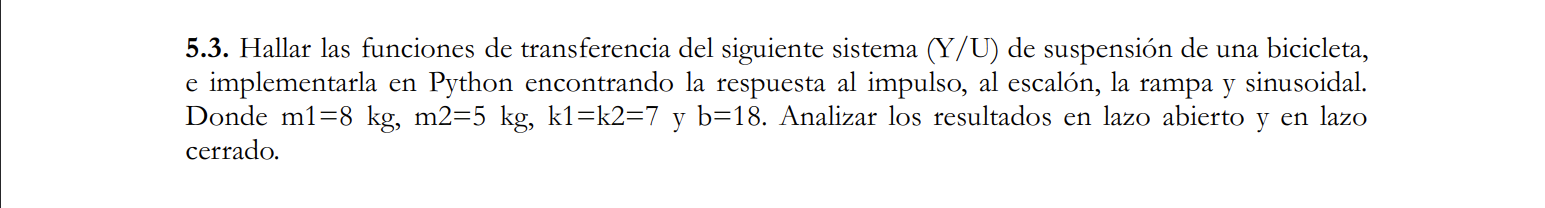

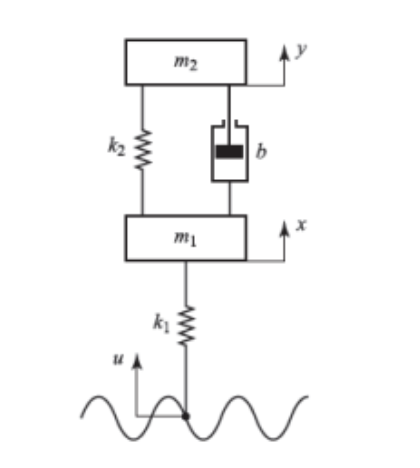

Polos del sistema:
Polo 1: (-5.3643171694907235+0j)
Polo 2: (-0.024595041238321305+0.7228881123953548j)
Polo 3: (-0.024595041238321305-0.7228881123953548j)
Polo 4: (-0.43649274803263827+0j)


/home/jp/Repositorios/Teoria_de_Control/.venv/lib/python3.12/site-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


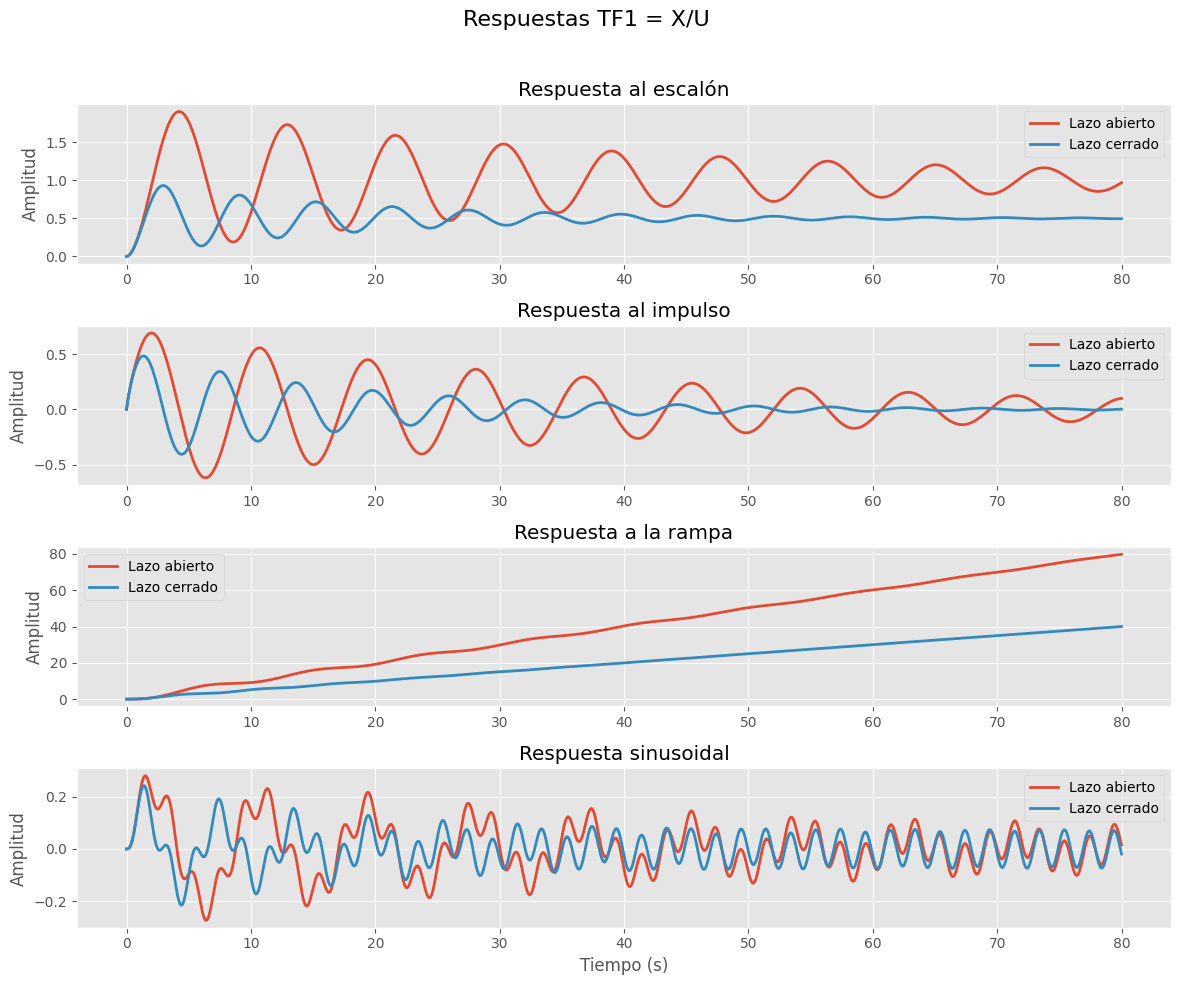

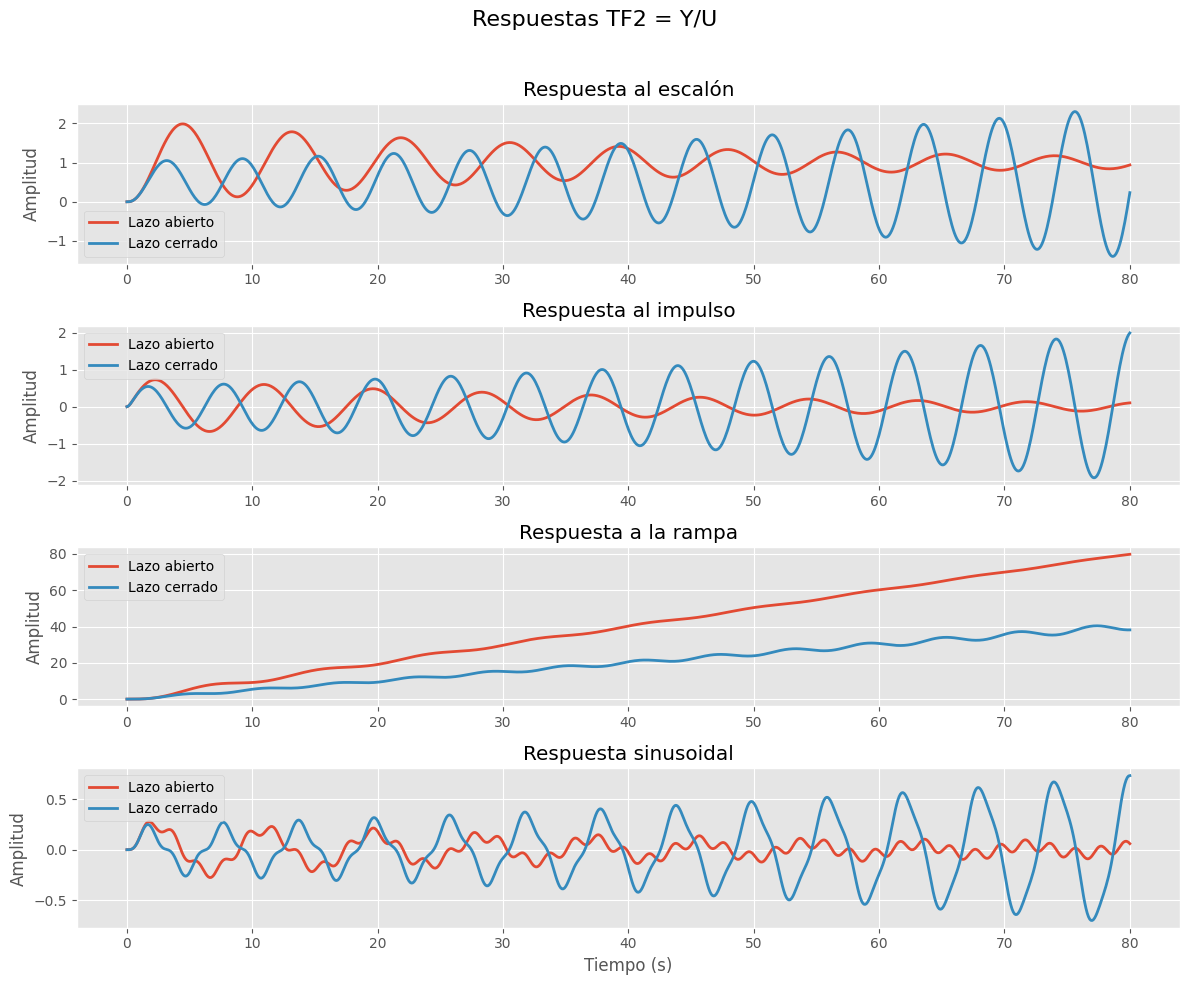

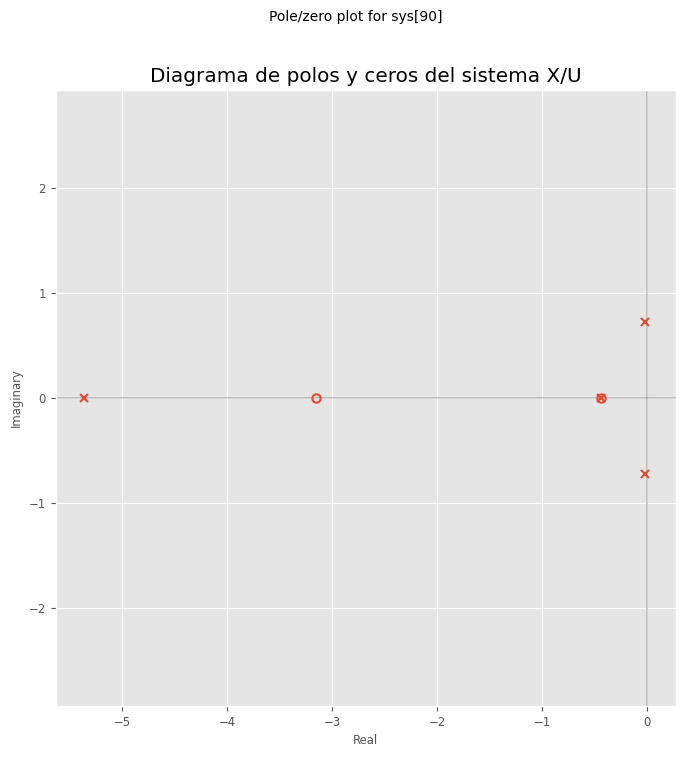

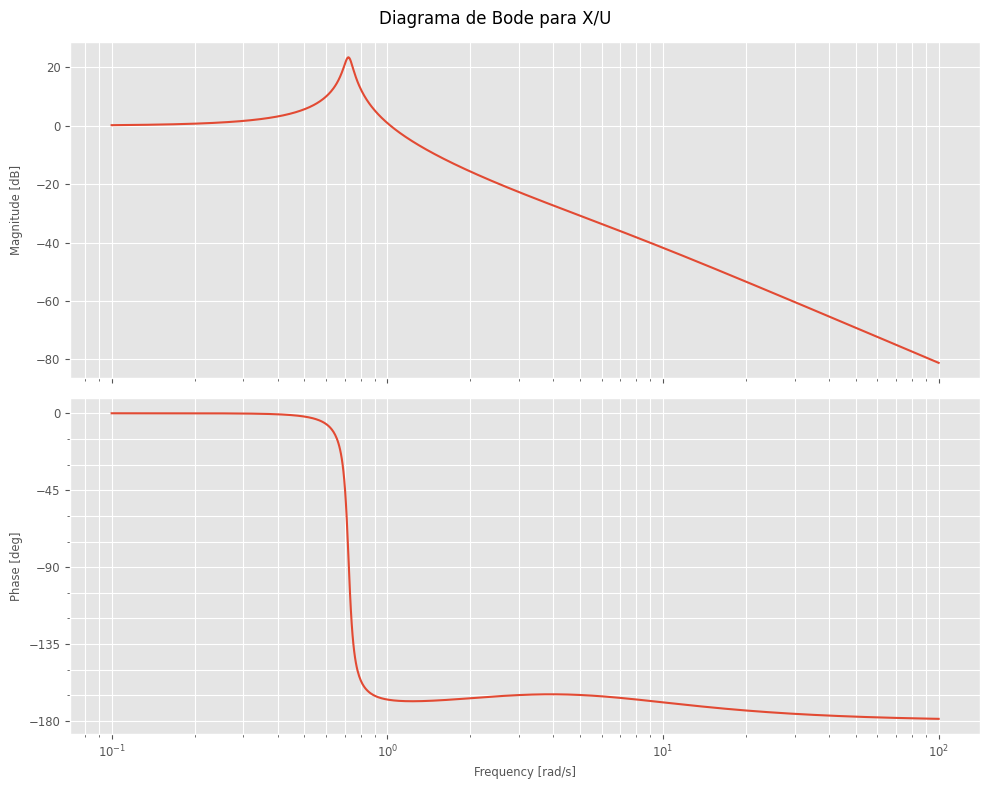

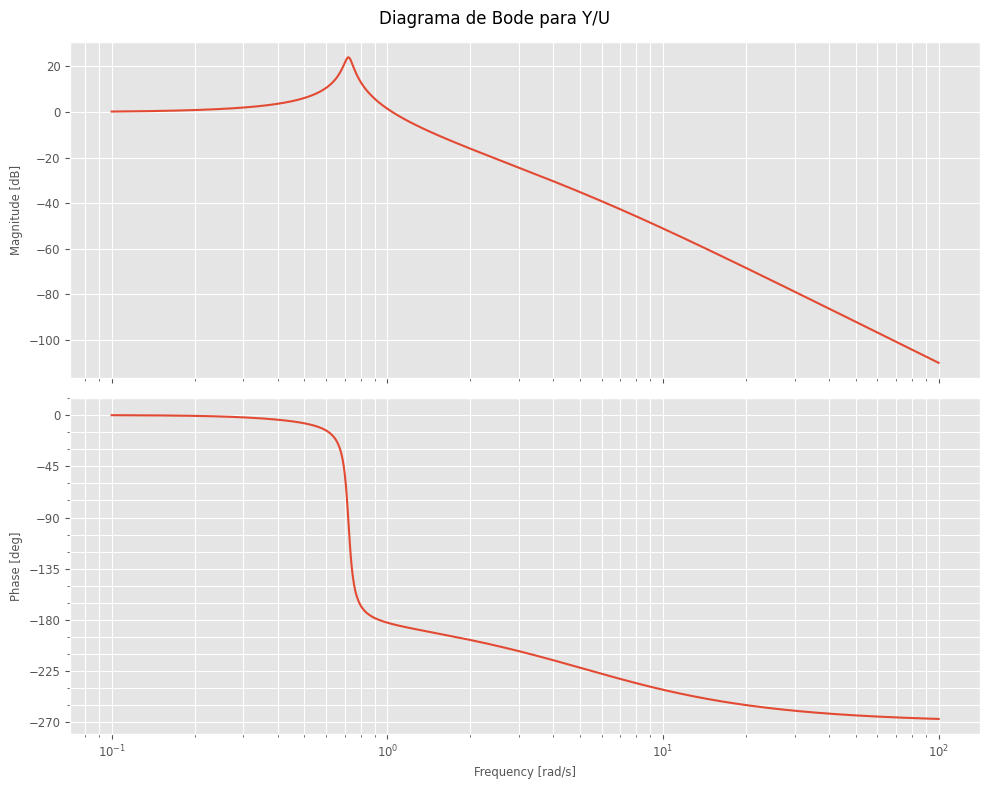


Función de transferencia X/U:
<TransferFunction>: sys[90]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          35 s^2 + 126 s + 49
---------------------------------------
40 s^4 + 234 s^3 + 126 s^2 + 126 s + 49


Función de transferencia Y/U:
<TransferFunction>: sys[91]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


              126 s + 49
---------------------------------------
40 s^4 + 234 s^3 + 126 s^2 + 126 s + 49



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control as ctrl

# Función para determinar estabilidad (para sistemas SISO)
def is_stable(sys):
    # Para sistemas SISO, la lista de denominadores es un arreglo anidado
    polos = np.roots(sys.den[0][0])
    return np.all(np.real(polos) < 0)

# Parámetros del sistema
m1 = 8    # kg
m2 = 5    # kg
k1 = 7    # N/m
k2 = 7    # N/m
b = 18    # Ns/m

# Definir las funciones de transferencia X/U y Y/U
# Para FTXU = X/U
num_FTXU = [k1 * m2, k1 * b, k2 * k1]
den_sys = [m1 * m2, (m2 * b) + (b * m1), (m2 * k1) + (m2 * k2) + (k2 * m1), b * k1, k2 * k1]
FTXU = ctrl.TransferFunction(num_FTXU, den_sys)

# Para FTYU = Y/U
num_FTYU = [b * k1, k2 * k1]
FTYU = ctrl.TransferFunction(num_FTYU, den_sys)

# Vector de tiempo para graficar
tiempo = np.arange(0, 80.1, 0.1)

# Calcular polos y ceros usando numpy.roots
poles = np.roots(den_sys)
zeros = np.roots(num_FTXU)
print("Polos del sistema:")
for i, polo in enumerate(poles):
    print(f"Polo {i+1}: {polo}")

# Realimentaciones para análisis en lazo cerrado
XU_feedback = ctrl.feedback(FTXU, 1)
YU_feedback = ctrl.feedback(FTYU, 1)

# ========== Respuesta al escalón ==========
# Lazo Abierto
t_step_XU_LA, escalonXU_LA = ctrl.step_response(FTXU, tiempo)
t_step_YU_LA, escalonYU_LA = ctrl.step_response(FTYU, tiempo)
# Lazo Cerrado
t_step_XU_LC, escalonXU_LC = ctrl.step_response(XU_feedback, tiempo)
t_step_YU_LC, escalonYU_LC = ctrl.step_response(YU_feedback, tiempo)

# ========== Respuesta al impulso ==========
# Lazo Abierto
t_imp_XU_LA, impulsoXU_LA = ctrl.impulse_response(FTXU, tiempo)
t_imp_YU_LA, impulsoYU_LA = ctrl.impulse_response(FTYU, tiempo)
# Lazo Cerrado
t_imp_XU_LC, impulsoXU_LC = ctrl.impulse_response(XU_feedback, tiempo)
t_imp_YU_LC, impulsoYU_LC = ctrl.impulse_response(YU_feedback, tiempo)

# ========== Respuesta a la rampa ==========
rampa_bici = tiempo * (tiempo >= 0)
# Lazo Abierto
t_ramp_XU_LA, rampaXU_LA = ctrl.forced_response(FTXU, tiempo, rampa_bici)
t_ramp_YU_LA, rampaYU_LA = ctrl.forced_response(FTYU, tiempo, rampa_bici)
# Lazo Cerrado
t_ramp_XU_LC, rampaXU_LC = ctrl.forced_response(XU_feedback, tiempo, rampa_bici)
t_ramp_YU_LC, rampaYU_LC = ctrl.forced_response(YU_feedback, tiempo, rampa_bici)

# ========== Respuesta sinusoidal ==========
frecuencia = 0.5  # Hz
sinusoidal = np.sin(2 * np.pi * frecuencia * tiempo)
# Lazo Abierto
t_sin_XU_LA, sinusoidalXU_LA = ctrl.forced_response(FTXU, tiempo, sinusoidal)
t_sin_YU_LA, sinusoidalYU_LA = ctrl.forced_response(FTYU, tiempo, sinusoidal)
# Lazo Cerrado
t_sin_XU_LC, sinusoidalXU_LC = ctrl.forced_response(XU_feedback, tiempo, sinusoidal)
t_sin_YU_LC, sinusoidalYU_LC = ctrl.forced_response(YU_feedback, tiempo, sinusoidal)

# ========== Graficación ==========
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 12]

# Para la función de transferencia X/U
plt.figure(figsize=(12, 10))
plt.suptitle("Respuestas TF1 = X/U", fontsize=16)

plt.subplot(4, 1, 1)
plt.plot(t_step_XU_LA, escalonXU_LA, linewidth=2, label="Lazo abierto")
plt.plot(t_step_XU_LC, escalonXU_LC, linewidth=2, label="Lazo cerrado")
plt.title("Respuesta al escalón")
plt.legend()
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t_imp_XU_LA, impulsoXU_LA, linewidth=2, label="Lazo abierto")
plt.plot(t_imp_XU_LC, impulsoXU_LC, linewidth=2, label="Lazo cerrado")
plt.title("Respuesta al impulso")
plt.legend()
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t_ramp_XU_LA, rampaXU_LA, linewidth=2, label="Lazo abierto")
plt.plot(t_ramp_XU_LC, rampaXU_LC, linewidth=2, label="Lazo cerrado")
plt.title("Respuesta a la rampa")
plt.legend()
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t_sin_XU_LA, sinusoidalXU_LA, linewidth=2, label="Lazo abierto")
plt.plot(t_sin_XU_LC, sinusoidalXU_LC, linewidth=2, label="Lazo cerrado")
plt.title("Respuesta sinusoidal")
plt.legend()
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Para la función de transferencia Y/U
plt.figure(figsize=(12, 10))
plt.suptitle("Respuestas TF2 = Y/U", fontsize=16)

plt.subplot(4, 1, 1)
plt.plot(t_step_YU_LA, escalonYU_LA, linewidth=2, label="Lazo abierto")
plt.plot(t_step_YU_LC, escalonYU_LC, linewidth=2, label="Lazo cerrado")
plt.title("Respuesta al escalón")
plt.legend()
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t_imp_YU_LA, impulsoYU_LA, linewidth=2, label="Lazo abierto")
plt.plot(t_imp_YU_LC, impulsoYU_LC, linewidth=2, label="Lazo cerrado")
plt.title("Respuesta al impulso")
plt.legend()
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t_ramp_YU_LA, rampaYU_LA, linewidth=2, label="Lazo abierto")
plt.plot(t_ramp_YU_LC, rampaYU_LC, linewidth=2, label="Lazo cerrado")
plt.title("Respuesta a la rampa")
plt.legend()
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t_sin_YU_LA, sinusoidalYU_LA, linewidth=2, label="Lazo abierto")
plt.plot(t_sin_YU_LC, sinusoidalYU_LC, linewidth=2, label="Lazo cerrado")
plt.title("Respuesta sinusoidal")
plt.legend()
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Gráfica adicional: diagrama de polos y ceros para X/U
plt.figure(figsize=(8, 8))
ctrl.pzmap(FTXU, plot=True)
plt.title("Diagrama de polos y ceros del sistema X/U")
plt.grid(True)

# Gráfica adicional: respuesta en frecuencia (Bode) para X/U
plt.figure(figsize=(10, 8))
ctrl.bode(FTXU, dB=True)
plt.suptitle("Diagrama de Bode para X/U")
plt.tight_layout()

# Gráfica adicional: respuesta en frecuencia (Bode) para Y/U
plt.figure(figsize=(10, 8))
ctrl.bode(FTYU, dB=True)
plt.suptitle("Diagrama de Bode para Y/U")
plt.tight_layout()

# Mostrar todas las gráficas
plt.show()

# Imprimir ecuaciones de las funciones de transferencia
print("\nFunción de transferencia X/U:")
print(FTXU)
print("\nFunción de transferencia Y/U:")
print(FTYU)




# **Análisis Dinámico de un Sistema de Suspensión**
## **Modelado, Respuesta Temporal y Estabilidad en Lazo Cerrado**

### **1. Modelado del Sistema**
El sistema mecánico de suspensión (Fig. 1) se describe mediante las ecuaciones de movimiento:

**Ecuaciones dinámicas**:
$$m_1\ddot{x}=-k_1(x-u)-b(\dot{x}-\dot{y})-k_2(x-y) \tag{3}$$  
$$m_2\ddot{y}=-b(\dot{y}-\dot{x})-k_2(y-x) \tag{4}$$  

- **Entrada**: $u(t)$ (desplazamiento del terreno).  
- **Salidas**: $x(t)$ (chasis) y $y(t)$ (rueda).  
- **Parámetros**: $k_1,k_2$ (rigideces), $b$ (amortiguamiento), $m_1,m_2$ (masas).  

A partir de las ecuaciones de movimiento, se obtuvieron las funciones de transferencia del sistema, las cuales son dos porque es el número máximo de combinaciones entre las dos salidas del sistema $(x,y)$ y su entrada $(u)$.  

**Funciones de transferencia**:  
$$\frac{X}{U}=\frac{k_1(m_2s^2+bs+k_2)}{\Delta(s)}, \quad \frac{Y}{U}=\frac{k_1(bs+k_2)}{\Delta(s)}$$  

donde:  
$$\Delta(s)=(m_2s^2+bs+k_2)(m_1s^2+k_1+bs+k_2)-(bs+k_2)^2$$  

---

### **2. Control en Lazo Cerrado**

#### **Resultados**
- En lazo cerrado, la frecuencia de las oscilaciones incrementa, y el tiempo de establecimiento y la amplitud de las señales disminuyen respecto a su comportamiento en lazo abierto. Por su parte, para la función rampa se evidencia una disminución de la pendiente en lazo cerrado respecto a lazo abierto.

- El comportamiento observado en las gráficas para la respuesta al escalón y al impulso, es una consecuencia directa de la dinámica de las raíces complejas conjugadas presentes en FT1 (−0.0246 ± 0.7229 j), que producen una respuesta oscilatoria subamortiguada. Además, en lazo cerrado, la retroalimentación provoca una amortiguación de las oscilaciones y reduce el sobreimpulso.

- La configuración en lazo cerrado produce una respuesta oscilatoria que aumenta de magnitud con el tiempo, lo cual es un indicador de la inestabilidad del sistema en esta configuraci´on. Esto se relaciona con que el lazo de retroalimentación implementado no es eficiente para ejercer un adecuado control sobre esta función de transferencia.

-  El sistema en lazo cerrado aunque presenta un mejor control de la salida deseada respecto a la real, es afectado por el error acumulado a lo largo del tiempo

---

### **3. Control en Lazo Abierto**

#### **Resultados**
- En lazo abierto, se evidencia que el sistema tiende a un valor fijo con el tiempo debido a su comportamiento subamortiguado causado por los polos complejos conjugados de la función de transferencia (−0.0246 ± 0.7229 j).

- En lazo abierto, el sistema no tiene ningún mecanismo de corrección, por lo que el desplazamiento aumenta proporcional a la entrada e indefinidamente.
 
---

### **4. Comparativa**

#### **4.1 Comparativo Lazo Abierto vs. Cerrado**

| Variable | Lazo Abierto | Lazo Cerrado | Conclusión |
|----------|--------------|--------------|------------|
| X/U | Subamortiguado (lento) | Mejor amortiguamiento (rápido) | Ideal para control activo. |
| Y/U | Estable | Inestable | Evitar realimentación directa. |


---

### **5. Conclusiones**
1. **Dinámica dominante**:  
   - Subamortiguamiento en X/U (polos complejos estables).  
   - Comportamiento crítico en Y/U bajo realimentación.  
2. **Control diferenciado**:  
   - Lazo cerrado mejora X/U (velocidad y precisión).  
   - Lazo abierto preferible para Y/U por estabilidad.  
3. **Relevancia práctica**:  
   - Sistemas de suspensión requieren equilibrio (oscilaciones controladas) y estabilidad.  
